In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [3]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [4]:
df

,Price,Open,High,Low
0,16.354,16.345,16.455,16.345
1,16.338,16.338,16.338,16.338
2,16.032,16.345,16.345,16.055
3,15.918,16.090,16.095,15.940
4,15.753,15.965,15.965,15.630
...,...,...,...,...
1409,23.635,23.690,23.785,23.320
1410,23.670,23.665,23.870,23.410
1411,23.529,23.675,24.165,23.480
1412,24.348,23.525,24.460,23.510


In [5]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

df

,Price,Open,High,Low
0,16.354,16.345,16.455,16.345
1,16.338,16.338,16.338,16.338
2,16.032,16.345,16.345,16.055
3,15.918,16.090,16.095,15.940
4,15.753,15.965,15.965,15.630
...,...,...,...,...
1409,23.635,23.690,23.785,23.320
1410,23.670,23.665,23.870,23.410
1411,23.529,23.675,24.165,23.480
1412,24.348,23.525,24.460,23.510


# SPLITTING DATA(7-2-1)

In [6]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [7]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3716580112212899
RMSE value for k=  2 is: 0.32377749068639283
RMSE value for k=  3 is: 0.2929697389279341
RMSE value for k=  4 is: 0.2979387398210748
RMSE value for k=  5 is: 0.318596823854559
RMSE value for k=  6 is: 0.33805569711782996
RMSE value for k=  7 is: 0.35656724058977113
RMSE value for k=  8 is: 0.3721155528964716
RMSE value for k=  9 is: 0.3845210712704065
RMSE value for k=  10 is: 0.39896620086496576
RMSE value for k=  11 is: 0.4077867235796041
RMSE value for k=  12 is: 0.41700253227499573
RMSE value for k=  13 is: 0.419244484202353
RMSE value for k=  14 is: 0.4241241051052582
RMSE value for k=  15 is: 0.4281007647267797
RMSE value for k=  16 is: 0.4343799188136723
RMSE value for k=  17 is: 0.44038680971710964
RMSE value for k=  18 is: 0.44946645298926646
RMSE value for k=  19 is: 0.45840305725478314
RMSE value for k=  20 is: 0.46802156550755347


<Axes: >

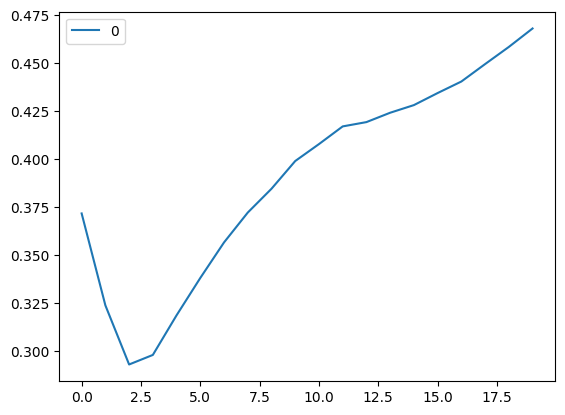

In [9]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [10]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [12]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097]


In [13]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.2929697389279341
Testing MAE:  0.22309929078014173
Testing MAPE:  1.0366303576087523
Validation RMSE:  0.30957951280321294
Validation MAE:  0.2346853146853146
Validation MAPE:  1.028223464383749


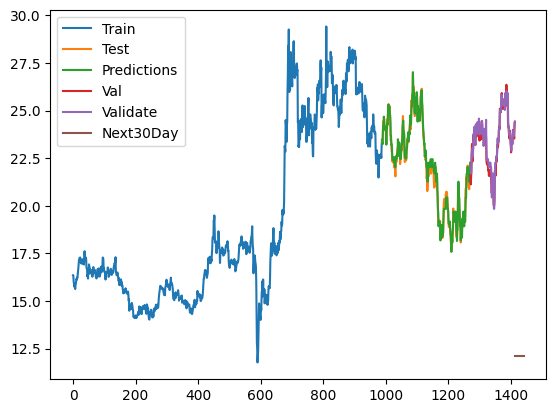

In [14]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [15]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.98


# SPLITTING DATA(6-3-1)

In [16]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [17]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [18]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.42335919113322773
RMSE value for k=  2 is: 0.4290794803666303
RMSE value for k=  3 is: 0.4301057829636604
RMSE value for k=  4 is: 0.43368216328320375
RMSE value for k=  5 is: 0.4454853946952605
RMSE value for k=  6 is: 0.44016893808100804
RMSE value for k=  7 is: 0.4496224483099775
RMSE value for k=  8 is: 0.4575380126893492
RMSE value for k=  9 is: 0.4697924713805558
RMSE value for k=  10 is: 0.4969124346524889
RMSE value for k=  11 is: 0.5186005934157708
RMSE value for k=  12 is: 0.5296582122800435
RMSE value for k=  13 is: 0.5334434011632476
RMSE value for k=  14 is: 0.5466101173187505
RMSE value for k=  15 is: 0.5597948561150908
RMSE value for k=  16 is: 0.5791395394069003
RMSE value for k=  17 is: 0.5924753982973868
RMSE value for k=  18 is: 0.6050280289318432
RMSE value for k=  19 is: 0.6111395229322304
RMSE value for k=  20 is: 0.6289802110060885


<Axes: >

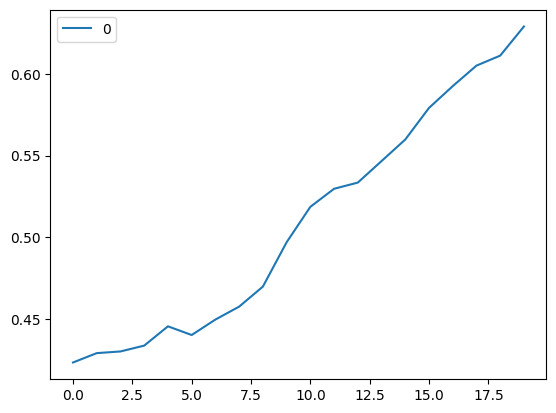

In [19]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [20]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [22]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097]


In [23]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.4301057829636604
Testing MAE:  0.2975699685534586
Testing MAPE:  1.3365104970685748
Validation RMSE:  0.43110870822781855
Validation MAE:  0.3112676056338021
Validation MAPE:  1.3748652640076262


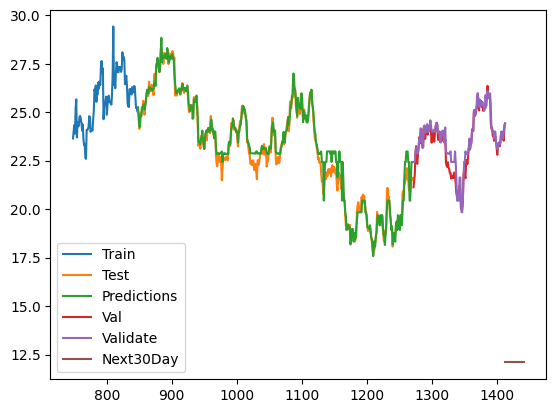

In [24]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [25]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.97


# SPLITTING DATA(5-3-2)

In [26]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [27]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [28]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5971020285907339
RMSE value for k=  2 is: 0.4926891780618333
RMSE value for k=  3 is: 0.48363188675561125
RMSE value for k=  4 is: 0.5700055861299428
RMSE value for k=  5 is: 0.6099913422676672
RMSE value for k=  6 is: 0.6237418317232775
RMSE value for k=  7 is: 0.6314125497641099
RMSE value for k=  8 is: 0.6348411270227791
RMSE value for k=  9 is: 0.6361877882617528
RMSE value for k=  10 is: 0.6587993871967063
RMSE value for k=  11 is: 0.6809006075898204
RMSE value for k=  12 is: 0.7011042586676268
RMSE value for k=  13 is: 0.7227896979945649
RMSE value for k=  14 is: 0.7361972608613735
RMSE value for k=  15 is: 0.7542192733380881
RMSE value for k=  16 is: 0.7869965829427757
RMSE value for k=  17 is: 0.8133693323446524
RMSE value for k=  18 is: 0.8357792205917939
RMSE value for k=  19 is: 0.8575553268156455
RMSE value for k=  20 is: 0.8787095121345865


<Axes: >

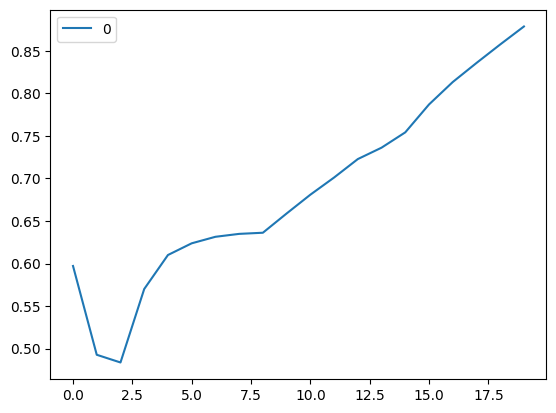

In [29]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [30]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [32]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097
 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097 12.097]


In [33]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.48363188675561125
Testing MAE:  0.35800471698113195
Testing MAPE:  1.451519116672743
Validation RMSE:  0.5058092560773954
Validation MAE:  0.37800471142520553
Validation MAPE:  1.73654841753133


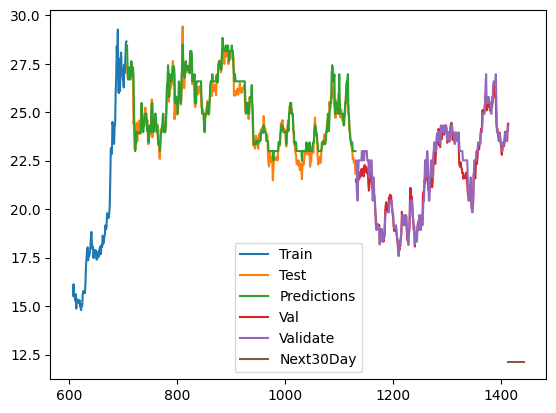

In [34]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [35]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.91


# EVALUATING MODEL

---
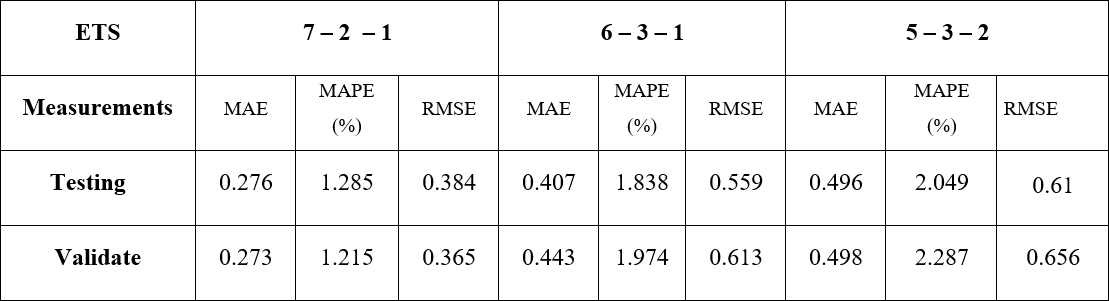